# Stream 3 Assignment

**Please update your name below and run the cell to verify your submission**

In [1]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment: Solutions by Sandy') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment: Solutions by Sandy
Local Time: 2024-10-06 21:31:38
Computer ID: Sanidhyas-MBP.lan


# Tasks
1. Create a geographic data visualization that shows the average wheat production by country for the years 2020 to 2022 (30% of assignment grade)
   
2. Create a geographic data visualization that shows world population by country (30% of assignment grade)
   
3. Create a geographic data visualization that shows 2022 wheat production per 1 million people by country (40% of assignment grade)

# Datasets

A) List of countries by wheat production https://en.wikipedia.org/wiki/List_of_countries_by_wheat_production
  
B) List of countries and dependencies by population https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population
  
C) World Countries Generalized (general boundaries for countries of the world) https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore


# Hints and Tips

- Datasets A and B have tables that can be read directly into a pandas dataframe using the following command: `pd.read_html(url)[0]`.

- Dataset C contains the geometry coordinates for geopandas plots. Download the file as a geojson and read it using the following command `gpd.read_file(geojson_file_path).rename(columns={'COUNTRY': 'Country'})`.

- Merge dataframes based on the country name. Ensure that the countries have the same name and can be merged together. You can use the following command: `pd.merge(df1, df2, on='Country', how='inner')`.

- Feel free to DM me (Alex D'Ippolito) on Slack if you have questions.

# Assignment Submission

- Create your own repository on github with your completed assignment and DM me the link

- Assignment is due by end of day on October 7, 2024

## Task 1 (started below)

In [86]:
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_wheat_production'

df=pd.read_html(url)[0]

df.head()

,Country,2022[1],2021[1],2020[1],2019[1],2018[1],2017[1],2016[1],2015[1],2014[1],...,2005[1],2004[1],2003[1],2002[1],2001[1],2000[1],1999[1],1998[1],1997[1],1996[1]
0,World total,808.4,772.8,757.0,764.1,732.4,772.9,748.4,741.8,728.8,...,627.0,634.7,550.0,592.0,588.2,587.6,581.5,593.3,619.1,571.4
1,China,137.7,136.9,134.3,133.6,131.4,134.2,133.3,132.6,126.2,...,97.4,92.0,86.5,90.3,93.9,99.6,113.9,109.7,123.3,110.6
2,India,107.7,109.6,107.9,103.6,99.9,98.5,92.3,86.5,95.9,...,68.6,72.2,65.8,72.8,69.7,76.4,71.3,66.3,69.4,62.1
3,Russia,104.2,76.1,85.9,74.5,72.1,86.0,73.3,61.8,59.7,...,47.6,45.4,34.1,50.6,47.0,34.5,31.0,27.0,44.2,34.8
4,United States,44.9,44.8,49.8,52.6,51.3,47.4,62.8,55.8,55.1,...,57.2,58.7,63.8,43.7,53.0,60.6,62.6,69.3,67.5,62.0


In [87]:
#Get data types of the columns
data_types = df.dtypes
print(data_types)


Country     object
2022[1]    float64
2021[1]    float64
2020[1]    float64
2019[1]    float64
2018[1]    float64
2017[1]    float64
2016[1]    float64
2015[1]    float64
2014[1]    float64
2013[1]    float64
2012[1]    float64
2011[1]    float64
2010[1]    float64
2009[1]    float64
2008[1]    float64
2007[1]    float64
2006[1]    float64
2005[1]    float64
2004[1]    float64
2003[1]    float64
2002[1]    float64
2001[1]    float64
2000[1]    float64
1999[1]    float64
1998[1]    float64
1997[1]    float64
1996[1]    float64
dtype: object


In [89]:
#Select and rename columns for year 2020, 2021 and 2022
select_columns = df[['2022[1]', '2021[1]', '2020[1]']]
select_columns.columns = ['2022', '2021', '2020']
print(select_columns)

     2022   2021   2020
0   808.4  772.8  757.0
1   137.7  136.9  134.3
2   107.7  109.6  107.9
3   104.2   76.1   85.9
4    44.9   44.8   49.8
5    36.2   31.9   14.5
6    34.6   36.6   30.2
7    34.3   22.4   35.4
8    26.2   27.5   25.2
9    22.6   21.5   22.2
10   22.2   17.6   19.8
11   20.7   32.2   24.9
12   19.8   17.7   20.5
13   16.4   11.8   14.3
14   15.5   14.0    9.7
15   13.2   11.9   12.5
16   10.3    7.9    6.3
17   10.0   10.1   10.4
18    9.7    9.8    9.1
19    8.7   10.4    6.4
20    7.0    5.8    5.5
21    6.6    7.3    6.7
22    6.5    8.6    8.1
23    6.4    7.3    4.8
24    6.3    6.0    6.2
25    5.2    5.0    4.9
26    4.5    4.2    4.8
27    4.4    5.3    5.1
28    4.2    4.0    4.1
29    3.8    4.0    5.2
30    3.6    3.3    3.0
31    3.2    3.0    3.2
32    3.1    3.4    2.9
33    3.0    2.2    3.1
34    2.8    4.2    6.2
35    2.7    7.5    2.6
36    2.5    2.4    2.7
37    2.4    2.4    2.8
38    2.1    2.1    2.2
39    2.1    2.3    2.1
40    2.0    2.0

In [40]:
#Calculate average and create new column
select_columns['Average'] = select_columns.mean(axis=1)

#Round the average to 2 decimal places
select_columns['Average'] = select_columns['Average'].round(2)
print(select_columns)

     2022   2021   2020  Average
0   808.4  772.8  757.0   779.40
1   137.7  136.9  134.3   136.30
2   107.7  109.6  107.9   108.40
3   104.2   76.1   85.9    88.73
4    44.9   44.8   49.8    46.50
5    36.2   31.9   14.5    27.53
6    34.6   36.6   30.2    33.80
7    34.3   22.4   35.4    30.70
8    26.2   27.5   25.2    26.30
9    22.6   21.5   22.2    22.10
10   22.2   17.6   19.8    19.87
11   20.7   32.2   24.9    25.93
12   19.8   17.7   20.5    19.33
13   16.4   11.8   14.3    14.17
14   15.5   14.0    9.7    13.07
15   13.2   11.9   12.5    12.53
16   10.3    7.9    6.3     8.17
17   10.0   10.1   10.4    10.17
18    9.7    9.8    9.1     9.53
19    8.7   10.4    6.4     8.50
20    7.0    5.8    5.5     6.10
21    6.6    7.3    6.7     6.87
22    6.5    8.6    8.1     7.73
23    6.4    7.3    4.8     6.17
24    6.3    6.0    6.2     6.17
25    5.2    5.0    4.9     5.03
26    4.5    4.2    4.8     4.50
27    4.4    5.3    5.1     4.93
28    4.2    4.0    4.1     4.10
29    3.8 

/var/folders/6p/pp8cz3090vl4_grtyrm2_w_80000gn/T/ipykernel_76445/3144284755.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6p/pp8cz3090vl4_grtyrm2_w_80000gn/T/ipykernel_76445/3144284755.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
#Creating a new dataframe for country and average wheat production
select_col_country = df[['Country']]
select_col_average = select_columns[['Average']]

#Concatenate the two columns
new_df = pd.concat([select_col_country, select_col_average], axis = 1)
print(new_df)

           Country  Average
0      World total   779.40
1            China   136.30
2            India   108.40
3           Russia    88.73
4    United States    46.50
5        Australia    27.53
6           France    33.80
7           Canada    30.70
8         Pakistan    26.30
9          Germany    22.10
10       Argentina    19.87
11         Ukraine    25.93
12          Turkey    19.33
13      Kazakhstan    14.17
14  United Kingdom    13.07
15          Poland    12.53
16          Brazil     8.17
17            Iran    10.17
18           Egypt     9.53
19         Romania     8.50
20        Ethiopia     6.10
21           Italy     6.87
22           Spain     7.73
23        Bulgaria     6.17
24      Uzbekistan     6.17
25         Czechia     5.03
26       Lithuania     4.50
27         Hungary     4.93
28         Denmark     4.10
29     Afghanistan     4.33
30          Mexico     3.30
31          Sweden     3.13
32          Serbia     3.13
33         Algeria     2.77
34            Iraq  

In [61]:
#Changing the name of United States
new_df['Country'] = new_df['Country'].replace('USA', 'United States of America')

print("\nDataFrame after replacement:")
print (new_df)


DataFrame after replacement:
                     Country  Average
0                World total   779.40
1                      China   136.30
2                      India   108.40
3                     Russia    88.73
4   United States of America    46.50
5                  Australia    27.53
6                     France    33.80
7                     Canada    30.70
8                   Pakistan    26.30
9                    Germany    22.10
10                 Argentina    19.87
11                   Ukraine    25.93
12                    Turkey    19.33
13                Kazakhstan    14.17
14            United Kingdom    13.07
15                    Poland    12.53
16                    Brazil     8.17
17                      Iran    10.17
18                     Egypt     9.53
19                   Romania     8.50
20                  Ethiopia     6.10
21                     Italy     6.87
22                     Spain     7.73
23                  Bulgaria     6.17
24                Uz

In [107]:
#Importing necessary libraries

import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [62]:
#Load world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/6p/pp8cz3090vl4_grtyrm2_w_80000gn/T/ipykernel_76445/3926210268.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [63]:
# Merge the average wheat production data with the world GeoDataFrame
world = world.merge(new_df, how='left', left_on='name', right_on='Country')

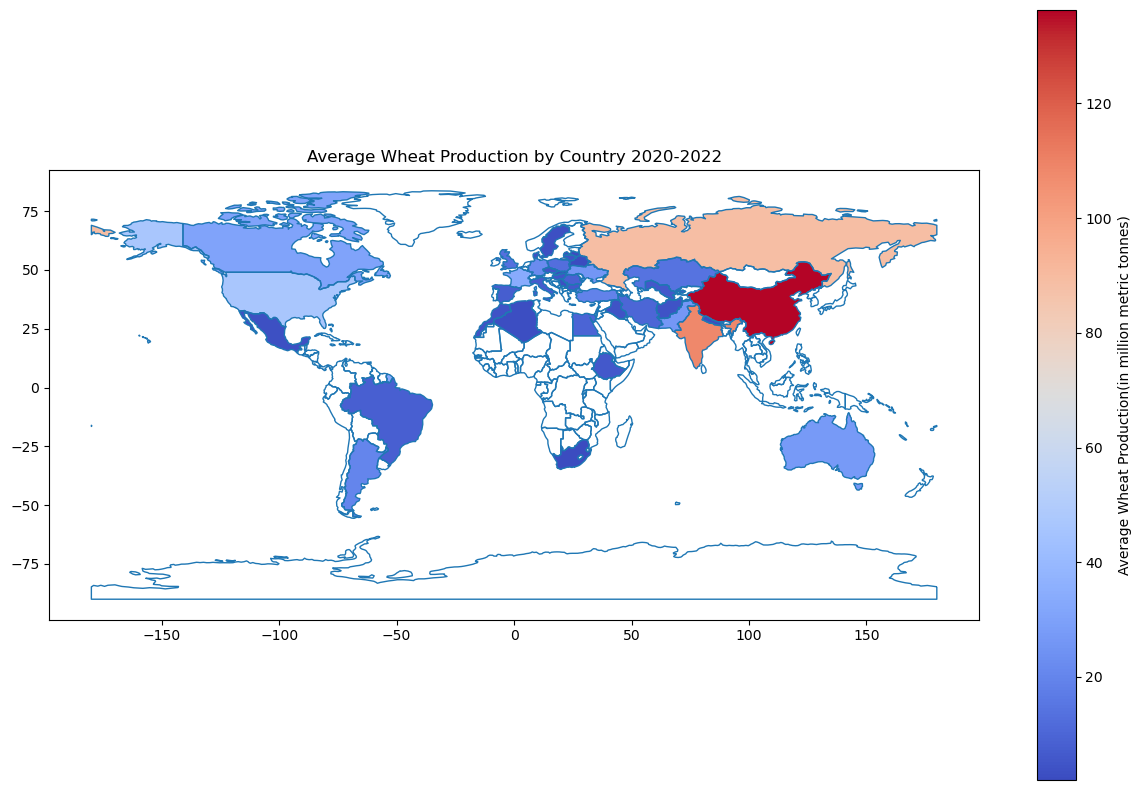

In [64]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Average', ax=ax, legend=True,
           legend_kwds={'label': "Average Wheat Production(in million metric tonnes)",
                        'orientation': "vertical"},
           cmap='coolwarm')

plt.title('Average Wheat Production by Country 2020-2022')
plt.show()

Task 2

In [65]:
#Loading the data from Wikipedia
url2 = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

df=pd.read_html(url2)[0]

df.head()

,Unnamed: 0,Location,Population,% of world,Date,Source (official or from the United Nations),Notes
0,–,World,8119000000,100%,1 Jul 2024,UN projection[1][3],NaN
1,1/2 [b],China,1409670000,17.3%,31 Dec 2023,Official estimate[5],[c]
2,1/2 [b],India,1404910000,17.3%,1 Jul 2024,Official projection[6],[d]
3,3,United States,335893238,4.1%,1 Jan 2024,Official estimate[7],[e]
4,4,Indonesia,281603800,3.5%,1 Jul 2024,National annual projection[8],NaN


In [68]:
#Select and rename columns
population_df = df[['Location', 'Population', '% of world']]
population_df.columns = ['Country', 'Population', 'Percentage']

#Change name of United States
population_df['Country'] = population_df['Country'].replace('United States', 'United States of America')

print("\nDataFrame after replacement:")

print(population_df)


DataFrame after replacement:
                                 Country  Population Percentage
0                                  World  8119000000       100%
1                                  China  1409670000      17.3%
2                                  India  1404910000      17.3%
3               United States of America   335893238       4.1%
4                              Indonesia   281603800       3.5%
..                                   ...         ...        ...
235                   Niue (New Zealand)        1681         0%
236                Tokelau (New Zealand)        1647         0%
237                         Vatican City         764         0%
238  Cocos (Keeling) Islands (Australia)         593         0%
239                Pitcairn Islands (UK)          35         0%

[240 rows x 3 columns]


/var/folders/6p/pp8cz3090vl4_grtyrm2_w_80000gn/T/ipykernel_76445/1893576316.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/6p/pp8cz3090vl4_grtyrm2_w_80000gn/T/ipykernel_76445/3544214644.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



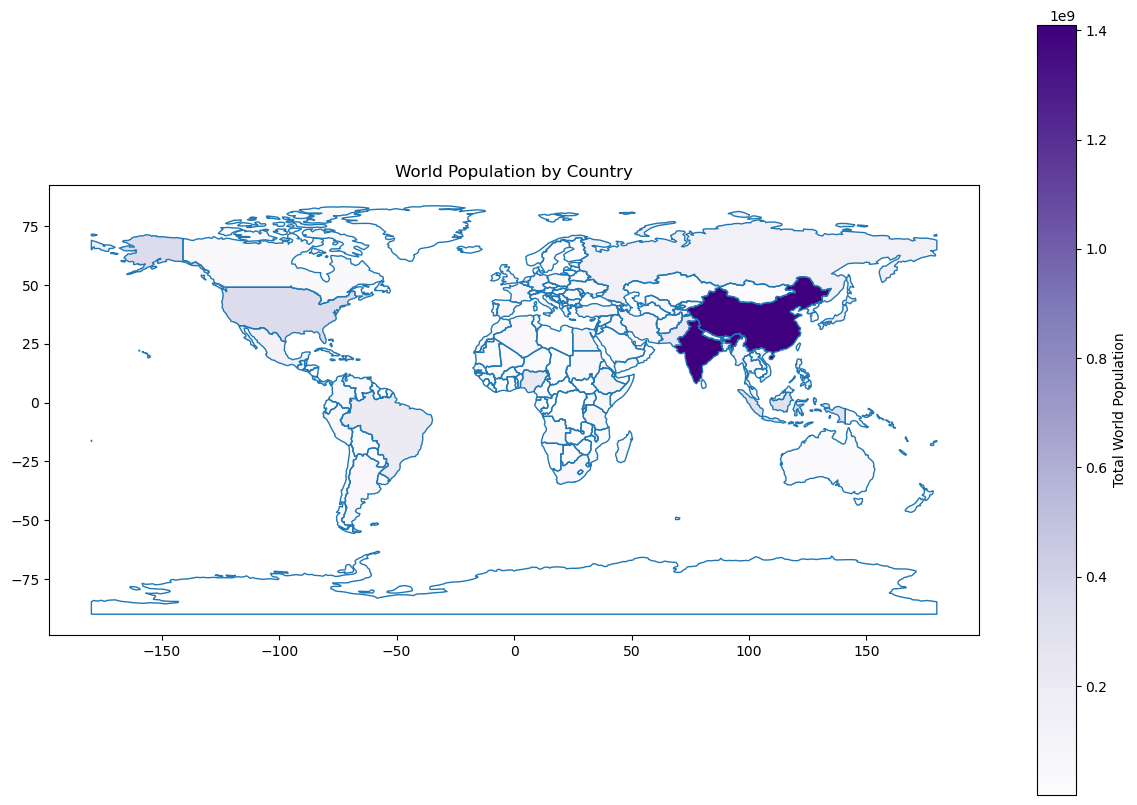

In [165]:
# Load world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the population data with the world GeoDataFrame
world = world.merge(population_df, how='left', left_on='name', right_on='Country')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Population', ax=ax, legend=True,
           legend_kwds={'label': "Total World Population",
                        'orientation': "vertical"},
           cmap='Purples')

plt.title('World Population by Country')
plt.show()

Task 3

In [141]:
#Create dataframe for country and 2022 wheat production data
wheat_2022 = df[['Country', '2022[1]']]
wheat_2022.columns = ['Country', '2022_wheat_prod']

#Change name of United States
wheat_2022['Country'] = wheat_2022['Country'].replace('United States', 'United States of America')

print(wheat_2022)

                     Country  2022_wheat_prod
0                World total            808.4
1                      China            137.7
2                      India            107.7
3                     Russia            104.2
4   United States of America             44.9
5                  Australia             36.2
6                     France             34.6
7                     Canada             34.3
8                   Pakistan             26.2
9                    Germany             22.6
10                 Argentina             22.2
11                   Ukraine             20.7
12                    Turkey             19.8
13                Kazakhstan             16.4
14            United Kingdom             15.5
15                    Poland             13.2
16                    Brazil             10.3
17                      Iran             10.0
18                     Egypt              9.7
19                   Romania              8.7
20                  Ethiopia      

/var/folders/6p/pp8cz3090vl4_grtyrm2_w_80000gn/T/ipykernel_76445/1308885586.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
# Merging dataframes from task 1 and task 2

merged_df = pd.merge(wheat_2022, population_df, on='Country', how='inner')
print (merged_df)


                     Country  2022_wheat_prod  Population Percentage
0                      China            137.7  1409670000      17.3%
1                      India            107.7  1404910000      17.3%
2                     Russia            104.2   146150789       1.8%
3   United States of America             44.9   335893238       4.1%
4                  Australia             36.2    27122411       0.3%
5                     France             34.6    68513000       0.8%
6                     Canada             34.3    41288599       0.5%
7                   Pakistan             26.2   241499431       3.0%
8                    Germany             22.6    84708010       1.0%
9                  Argentina             22.2    47067441       0.6%
10                   Ukraine             20.7    36700000       0.5%
11                    Turkey             19.8    85372377       1.0%
12                Kazakhstan             16.4    20201849       0.2%
13            United Kingdom      

In [143]:
# Get data types of the columns
data_types2 = merged_df.dtypes
print(data_types2)

Country             object
2022_wheat_prod    float64
Population           int64
Percentage          object
dtype: object


In [144]:
# Convert wheat production from million metric tonnes to tonnes
merged_df['Wheat_Production_Tonnes'] = merged_df['2022_wheat_prod'] * 1_000_000


In [147]:
# Calculate wheat production per million people
merged_df['Wheat_per_million'] = (merged_df['Wheat_Production_Tonnes'] / merged_df['Population']) * 1000

print(merged_df[['Country', 'Wheat_Production_Tonnes', 'Population', 'Wheat_per_million']])


                     Country  Wheat_Production_Tonnes  Population  \
0                      China              137700000.0  1409670000   
1                      India              107700000.0  1404910000   
2                     Russia              104200000.0   146150789   
3   United States of America               44900000.0   335893238   
4                  Australia               36200000.0    27122411   
5                     France               34600000.0    68513000   
6                     Canada               34300000.0    41288599   
7                   Pakistan               26200000.0   241499431   
8                    Germany               22600000.0    84708010   
9                  Argentina               22200000.0    47067441   
10                   Ukraine               20700000.0    36700000   
11                    Turkey               19800000.0    85372377   
12                Kazakhstan               16400000.0    20201849   
13            United Kingdom      

In [148]:
# Load world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge dataframe with the world GeoDataFrame
world = world.merge(merged_df, how='left', left_on='name', right_on='Country')


/var/folders/6p/pp8cz3090vl4_grtyrm2_w_80000gn/T/ipykernel_76445/908446691.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



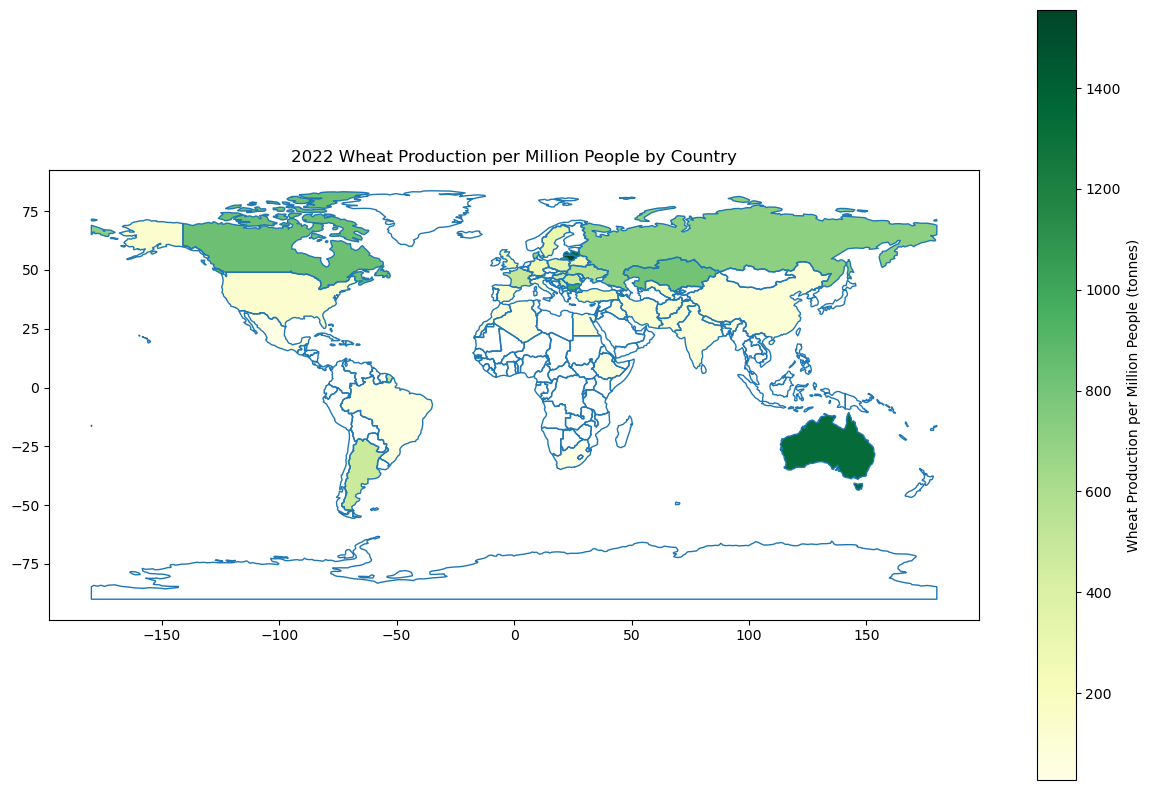

In [150]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Wheat_per_million', ax=ax, legend=True,
           legend_kwds={'label': "Wheat Production per Million People (tonnes)",
                        'orientation': "vertical"},
           cmap='YlGn')

plt.title('2022 Wheat Production per Million People by Country')
plt.show()